In [50]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# defining the data
df = pd.read_csv("house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [52]:
df.shape

(1000, 8)

# Initialzing , Data Cleaning & Preprocessing

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [54]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [57]:
df.duplicated().sum()

np.int64(0)

# Univariant

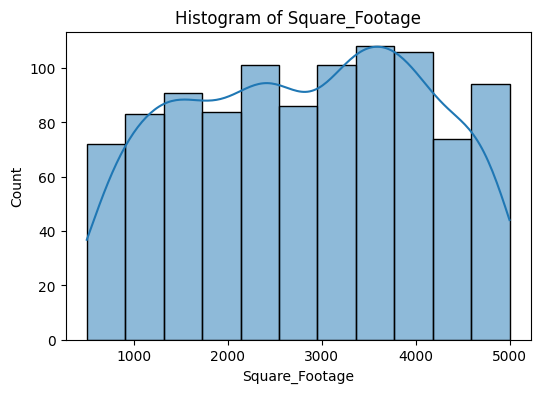

In [58]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Square_Footage'], kde=True) 
plt.title('Histogram of Square_Footage')
plt.show()

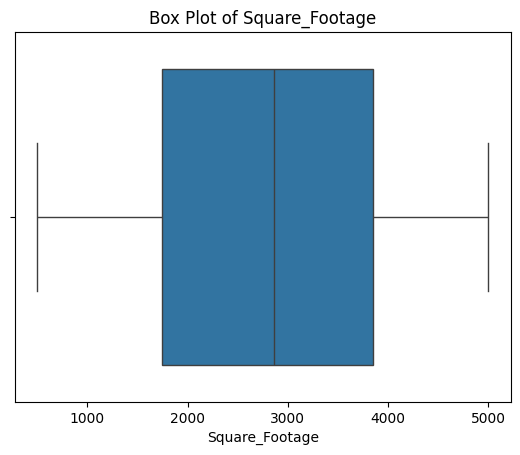

In [59]:
sns.boxplot(x=df['Square_Footage'])
plt.title('Box Plot of Square_Footage')
plt.show()

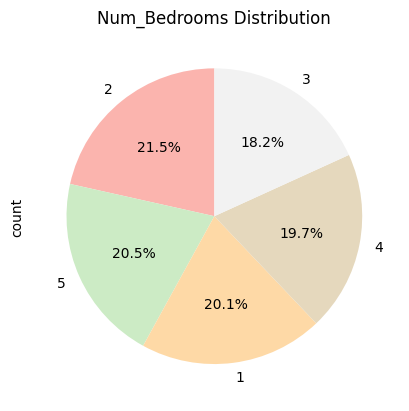

In [60]:
category_counts = df['Num_Bedrooms'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Num_Bedrooms Distribution')
plt.show()

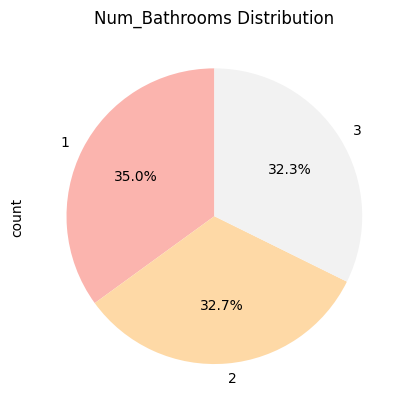

In [61]:
category_counts = df['Num_Bathrooms'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Num_Bathrooms Distribution')
plt.show()

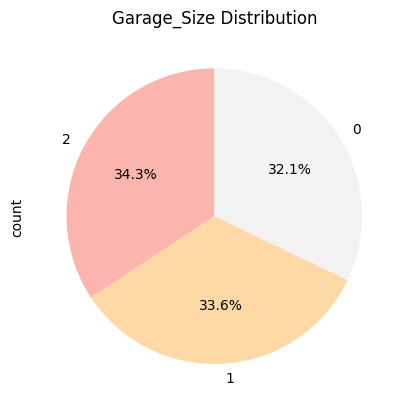

In [62]:
category_counts = df['Garage_Size'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Garage_Size Distribution')
plt.show()

# Bivariant & Multivariate Analysis

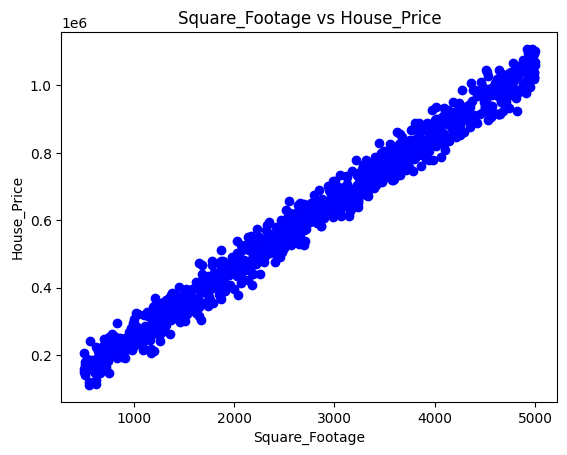

In [63]:
plt.scatter("Square_Footage", "House_Price", data=df, color='blue')
plt.xlabel("Square_Footage")
plt.ylabel("House_Price")
plt.title("Square_Footage vs House_Price")
plt.show()

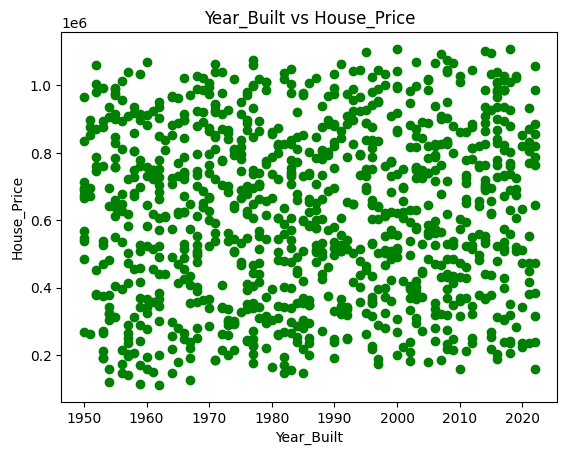

In [64]:
plt.scatter("Year_Built", "House_Price", data=df, color='green')
plt.xlabel("Year_Built")
plt.ylabel("House_Price")
plt.title("Year_Built vs House_Price")
plt.show()

# Feature Engineering

In [65]:
df = df.drop('Num_Bedrooms', axis=1)
df.head()

,Square_Footage,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,2016,4.753014,1,6,9.852609e+05
2,3592,2,2016,3.634823,0,9,7.779774e+05
3,966,2,1977,2.730667,1,8,2.296989e+05
4,4926,1,1993,4.699073,0,8,1.041741e+06


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Square_Footage', 'Year_Built']] = scaler.fit_transform(df[['Square_Footage', 'Year_Built']])

In [67]:
df[['Num_Bathrooms', 'Lot_Size','Garage_Size','Neighborhood_Quality']] = scaler.fit_transform(df[['Num_Bathrooms', 'Lot_Size','Garage_Size','Neighborhood_Quality']])

In [68]:
df.head()

,Square_Footage,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,-1.159803,-1.186699,-0.269122,-1.679278,-1.254658,-0.213126,2.623829e+05
1,1.160724,1.252559,1.428045,1.522390,-0.027008,0.133420,9.852609e+05
2,0.618843,0.032930,1.428045,0.660422,-1.254658,1.173060,7.779774e+05
3,-1.473776,0.032930,-0.463084,-0.036555,-0.027008,0.826514,2.296989e+05
4,1.681887,-1.186699,0.312764,1.480809,-1.254658,0.826514,1.041741e+06


In [69]:
df.shape

(1000, 7)

In [70]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [71]:
X.shape,y.shape

((1000, 6), (1000,))

# Linear regression

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 6), (200, 6), (800,), (200,))

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 309687587.6215454
R-squared Score: 0.9951955774331006


In [77]:
model.intercept_,model.coef_

(np.float64(618684.0320227299),
 array([ 2.49852950e+05,  7.35222701e+03,  2.02572845e+04,  1.91660802e+04,
         6.00913699e+03, -1.50385463e+02]))

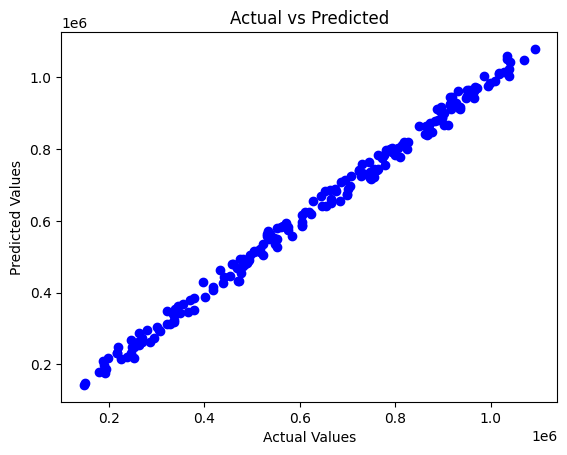

In [78]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()